# After an introduction to machine learning that we did in the two previous sessions and the problem of classification that we worked on and the main steps we must go through in order to solve the problems.



*   ***we are here to see a problem of regression and see some technique to solve it***
*  **This netbook made by Haythem Tellili**







# **Flight Delay Prediction Challenge**

![alt text](https://www.ibmbigdatahub.com/sites/default/files/flightdelays_embed.jpg)

**To solve a machine learning problem there is some steps we should do and other things we should check:**

*  Step 1: Problem definition and Building intuition about the data
*  Step 2: Exploratory Data Analysis 
*  Step 3: Feature Engineering: Feature selection and generation
*  Step 4: Modeling
*  Step 5: Evaluation Strategy
*  Step 6: Optimization (RMSE)






**Metrics: root mean square error**

![alt text](https://www.includehelp.com/ml-ai/Images/rmse-1.jpg)

In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error


In [0]:
train=pd.read_csv('./Train(4).csv')
test=pd.read_csv('./Test(4).csv')
sub=pd.read_csv('/content/SampleSubmission(10).csv')

In [0]:
train.head(10)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18.15.00,ATA,TU 736IOP,53.0
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09.00.00,ATA,TU 32AIMH,10.0
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09.55.00,ATA,TU 32AIMI,15.0
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09.00.00,ATA,TU 32AIMC,16.0
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09.15.00,ATA,TU 31AIMK,21.0


In [0]:
train.isnull().sum()

ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64

In [0]:
train.describe()

,target
count,107833.000000
mean,48.733013
std,117.135562
min,0.000000
25%,0.000000
50%,14.000000
75%,43.000000
max,3451.000000


(array([1.05354e+05, 1.98900e+03, 3.11000e+02, 6.80000e+01, 3.90000e+01,
        3.10000e+01, 9.00000e+00, 2.50000e+01, 4.00000e+00, 3.00000e+00]),
 array([   0. ,  345.1,  690.2, 1035.3, 1380.4, 1725.5, 2070.6, 2415.7,
        2760.8, 3105.9, 3451. ]),
 <a list of 10 Patch objects>)

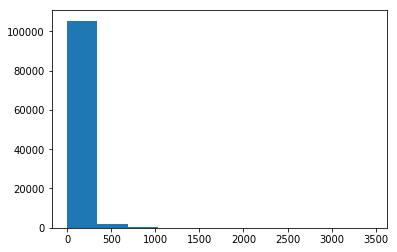

In [0]:
plt.hist(train['target'])

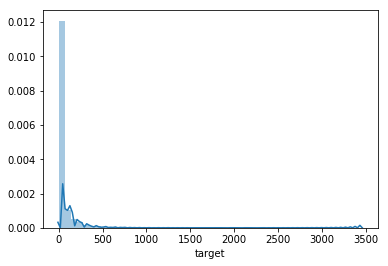

In [0]:
sns.distplot(train['target']);

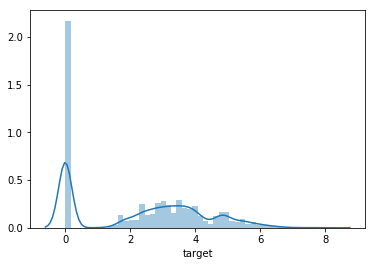

In [0]:
import numpy as np
sns.distplot(np.log1p(train["target"]));

In [0]:
target=np.log1p(train["target"])

# **Feature engineering **

In [0]:
train['STA'] =  pd.to_datetime(train['STA'], format='%Y-%m-%d %H.%M.%S')
train['STD'] =  pd.to_datetime(train['STD'], format='%Y-%m-%d %H:%M:%S')

In [0]:
test['STA'] =  pd.to_datetime(test['STA'], format='%Y-%m-%d %H.%M.%S')
test['STD'] =  pd.to_datetime(test['STD'], format='%Y-%m-%d %H:%M:%S')

In [0]:
train['diff_minutes'] = train['STA'] - train['STD']
train['diff_minutes']=train['diff_minutes']/np.timedelta64(1,'m')

test['diff_minutes'] = test['STA'] - test['STD']
test['diff_minutes']=test['diff_minutes']/np.timedelta64(1,'m')

In [0]:
train['diff_minutes'].describe()

count    107833.000000
mean        222.629687
std        5077.970136
min          10.000000
25%          95.000000
50%         140.000000
75%         165.000000
max      719520.000000
Name: diff_minutes, dtype: float64

In [0]:
train['DATOP']=pd.to_datetime(train['DATOP'])
train['day1'] = train['STA'].dt.day
train['day'] = train['DATOP'].dt.day
train['day2']=train['day1']-train['day']

In [0]:
test['DATOP']=pd.to_datetime(test['DATOP'])
test['day1'] = test['STA'].dt.day
test['day'] = test['DATOP'].dt.day
test['day2']=test['day1']-test['day']

In [0]:
train['day2'].value_counts()

 0     101499
 1       5862
-30       134
 2        111
-29        59
 3         36
 4         17
-27        15
 6         13
 5         11
-28        10
 7          8
 11         4
-25         4
-19         3
-26         3
 23         2
-10         2
-4          2
-7          2
 8          2
 9          2
 10         2
 17         2
 20         2
-1          2
-2          2
-20         2
-11         1
-22         1
-3          1
-17         1
-5          1
-6          1
-18         1
-9          1
-21         1
-23         1
 25         1
-24         1
 15         1
 16         1
-12         1
 19         1
 22         1
-16         1
 24         1
-13         1
Name: day2, dtype: int64

In [0]:
train=train[train['day2']>-17]
train=train[train['day2']< 17]

In [0]:
del train['day'],train['day1']
del test['day'],test['day1']

In [0]:

for trans in [train,test]:
    trans['DATOP']=pd.to_datetime(trans['DATOP'])
    trans['year'] = trans['DATOP'].dt.year
    trans['weekofyear'] = trans['DATOP'].dt.weekofyear
    trans['month'] = trans['DATOP'].dt.month
    trans['dayofweek'] = trans['DATOP'].dt.dayofweek
    trans['weekend'] = (trans.DATOP.dt.weekday >=5).astype(int)


In [0]:
train['DEPSTN'].value_counts()


TUN    42393
DJE    10239
ORY     6755
MIR     5232
MRS     2843
LYS     2354
NCE     2225
ALG     1573
MXP     1534
IST     1439
FRA     1378
BRU     1373
CMN     1349
FCO     1266
TOE     1199
CDG     1151
JED     1133
GVA     1113
NBE      918
SFA      917
TLS      850
DUS      831
ABJ      797
PRG      797
MED      782
MUC      748
BCN      723
LHR      583
MAD      579
SXB      569
       ...  
LAD        2
FBM        2
KEF        1
ADB        1
KTW        1
SKX        1
TPS        1
LFW        1
FIH        1
BDS        1
GHA        1
CTA        1
KBP        1
ESB        1
MVB        1
TMR        1
KRR        1
KRT        1
DOH        1
LBV        1
TLL        1
GNB        1
OTP        1
AAE        1
AAL        1
STR        1
BRI        1
SKG        1
JIB        1
RAK        1
Name: DEPSTN, Length: 132, dtype: int64

In [0]:
encoding= train.groupby('DEPSTN').size()
encoding1= test.groupby('DEPSTN').size()

encoding= encoding/len(train)
encoding1= encoding1/len(test)

train['DEPSTN']= train.DEPSTN.map(encoding)
test['DEPSTN']= test.DEPSTN.map(encoding1)


In [0]:
encoding= train.groupby('FLTID').size()
encoding1= test.groupby('FLTID').size()

encoding= encoding/len(train)
encoding1= encoding1/len(test)

train['FLTID']= train.FLTID.map(encoding)
test['FLTID']= test.FLTID.map(encoding1)

In [0]:
encoding= train.groupby('ARRSTN').size()
encoding1= test.groupby('ARRSTN').size()

encoding= encoding/len(train)
encoding1= encoding1/len(test)

train['ARRSTN']= train.ARRSTN.map(encoding)
test['ARRSTN']= test.ARRSTN.map(encoding1)

![alt text](https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/02/Regular-Expressions-in-Python-01.jpg)

In [0]:
import re
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
  dataset['Title2'] = dataset['AC'].astype(str)
  dataset['Title2'] = dataset['AC'].str.extract('(\d+)', expand=False).str.strip()


In [0]:
 # combining train and test dataset
for dataset in train_test_data:
  dataset['Title1'] = dataset['AC'].astype(str)
  dataset['Title1'] = dataset['AC'].str.extract('([a-zA-Z ]+)', expand=False).str.strip()

In [0]:
train.drop('ID',axis=1,inplace=True)
test.drop('ID',axis=1,inplace=True)

In [0]:
train.drop('AC',axis=1,inplace=True)
test.drop('AC',axis=1,inplace=True)

In [0]:
train.drop('DATOP',axis=1,inplace=True)
test.drop('DATOP',axis=1,inplace=True)

In [0]:
train.drop('STD',axis=1,inplace=True)
test.drop('STD',axis=1,inplace=True)
train.drop('STA',axis=1,inplace=True)
test.drop('STA',axis=1,inplace=True)

In [0]:
sex_mapping = {2016: 0, 2017: 1,2018:2}
for dataset in train_test_data:
    dataset['year'] = dataset['year'].map(sex_mapping)

In [0]:
test.head()

,FLTID,DEPSTN,ARRSTN,STATUS,diff_minutes,day2,year,weekofyear,month,dayofweek,weekend,Title2,Title1
0,0.008465,0.099218,0.391085,ATA,50.0,0,0,18,5,2,0,32,TU
1,0.000964,0.387978,0.004607,ATA,285.0,0,0,18,5,3,0,320,TU
2,0.008143,0.012750,0.391085,ATA,145.0,0,0,18,5,4,0,32,TU
3,0.003750,0.003750,0.391085,ATA,210.0,0,0,19,5,2,0,31,TU
4,0.010500,0.061502,0.055502,ATA,165.0,0,0,19,5,2,0,736,TU


In [0]:
train.head()

,FLTID,DEPSTN,ARRSTN,STATUS,target,diff_minutes,day2,year,weekofyear,month,dayofweek,weekend,Title2,Title1
0,0.009295,0.012539,0.394220,ATA,260.0,145.0,0,0,53,1,6,1,32,TU
1,0.008969,0.014258,0.394220,ATA,20.0,110.0,0,0,2,1,2,0,31,TU
2,0.004248,0.394035,0.013403,ATA,0.0,155.0,0,0,2,1,5,1,32,TU
3,0.001599,0.095169,0.005019,ATA,0.0,170.0,0,0,2,1,6,1,736,TU
4,0.005242,0.394035,0.014621,ATA,22.0,80.0,0,0,2,1,6,1,320,TU


![alt text](https://miro.medium.com/max/2736/0*T5jaa2othYfXZX9W.)

In [0]:
train=pd.get_dummies(train,columns=['STATUS'])
test=pd.get_dummies(test,columns=['STATUS'])

In [0]:
train.shape,test.shape

((107587, 18), (9333, 17))

In [0]:
encoding= train.groupby('Title1').size()
encoding1= test.groupby('Title1').size()

encoding= encoding/len(train)
encoding1= encoding1/len(test)

train['Title1']= train.Title1.map(encoding)
test['Title1']= test.Title1.map(encoding1)

In [0]:
encoding= train.groupby('Title2').size()
encoding1= test.groupby('Title2').size()

encoding= encoding/len(train)
encoding1= encoding1/len(test)

train['Title2']= train.Title2.map(encoding)
test['Title2']= test.Title2.map(encoding1)

In [0]:
del train['weekofyear']
del test['weekofyear']

## **Detect Outlier** **

A Z-score is a numerical measurement used in statistics of a value's relationship to the mean (average) of a group of values, measured in terms of standard deviations from the mean. 
![alt text](https://i.ytimg.com/vi/-IGW7WH6CIA/maxresdefault.jpg)

In [0]:
train['diff_minutes'].max()

719520.0

In [0]:
train['diff_minutes'].mean()

204.76016619108256

In [0]:
train['col_zscore'] = (train["diff_minutes"] - train["diff_minutes"].mean())/train["diff_minutes"].std(ddof=0)

In [0]:
train['outlier'] = (abs(train['col_zscore'])> 3).astype(int)

In [0]:
print ("Print number of outliers = " +str(train.outlier.value_counts()[1]))

Print number of outliers = 37


In [0]:
train=train[train.outlier != 1]

In [0]:
train.shape,test.shape

((107550, 19), (9333, 16))

In [0]:
del train['outlier']
del train['col_zscore']


In [0]:
target=train['target']
train.drop('target',axis=1,inplace=True)

In [0]:
train['day2'] = train['day2'].astype(object)
test['day2'] = test['day2'].astype(object)

In [0]:
# Label Encoding
from sklearn import preprocessing
for f in train.columns:
    if train[f].dtype=='object' or test[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))   

## Normalization

![alt text](https://chrisalbon.com/images/machine_learning_flashcards/MinMax_Scaling_print.png)

In [0]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
sc = StandardScaler()
train = sc.fit_transform(train)
test = sc.transform(test)



## `Define a cross validation strategy`


![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/K-fold_cross_validation_EN.svg/1200px-K-fold_cross_validation_EN.svg.png)

**To solve the two issue we use an approach called cross-validation**
Cross-validation is a statistical technique which involves partitioning the data into subsets, training the data on a subset and use the other subset to evaluate the model’s performance.


1.   Train_Test Split approach.
2.   K-Folds Cross Validation
3.   Stratified k-fold cross validation
4.   Cross validation for time series





In [0]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,target,shuffle=True,test_size = 0.2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((86040, 16), (21510, 16), (86040,), (21510,))

In [0]:
from sklearn.tree import DecisionTreeRegressor
dtm = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
dtm.fit(X_train,y_train)
pred=dtm.predict(X_test)
rmsle(y_test,pred)


120.58845644808221

**Hyperparameter tuning with GridSearchCV**

In [0]:
from sklearn.model_selection import GridSearchCV
param_grid = {"criterion": ["mse"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)

grid_cv_dtm.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=4,
                                             max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['mse'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         'min_samples_leaf': [20, 40, 100],
                         'min

In [0]:
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 8, 'max_leaf_nodes': 100, 'min_samples_leaf': 100, 'min_samples_split': 10}


In [0]:
best_dtm_model = grid_cv_dtm.best_estimator_
pred=best_dtm_model.predict(X_test)
rmsle(y_test,pred)

119.14719656353965

![alt text](https://miro.medium.com/max/592/1*i0o8mjFfCn-uD79-F1Cqkw.png)

In [0]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
           max_features='sqrt', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
rmsle(y_test,pred)

117.60756593282527

In [0]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)
model_xgb.fit(X_train,y_train)
pred=model_xgb.predict(X_test)
rmsle(y_test,pred)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


117.4863253818126

**K-Folds Cross Validation**

In [0]:
#Validation function
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, target, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [0]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 114.1345 (16.7857)



In [0]:
score = rmsle_cv(ENet)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 188860827.32092, tolerance: 131200.3895013928
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151294900.65772605, tolerance: 110199.32592944975
  positive)



Lasso score: 114.1340 (16.7861)



## Gradient Boosting technique

![alt text](https://cdn-images-1.medium.com/max/2600/1*A0b_ahXOrrijazzJengwYw.png)

In [0]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [0]:
model_xgb.fit(train,target)

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.5, gamma=0.04,
             importance_type='gain', learning_rate=0.02, max_delta_step=0,
             max_depth=5, min_child_weight=1.5, missing=None, n_estimators=500,
             n_jobs=1, nthread=-1, objective='reg:linear', random_state=0,
             reg_alpha=0.6, reg_lambda=0.5, scale_pos_weight=1, seed=None,
             silent=1, subsample=0.213, verbosity=1)

In [0]:
pred=model_lgb.predict(test)

In [0]:
preds=pd.DataFrame(pred)

In [0]:

preds.head(8)

,0
0,20.404209
1,69.377113
2,42.475952
3,14.125857
4,14.516754
5,33.850037
6,29.967596
7,51.208073


In [0]:
sub.head()

,ID,target
0,test_id_0,2470
1,test_id_1,2944
2,test_id_2,2585
3,test_id_3,3264
4,test_id_4,1369


In [0]:

submission = pd.DataFrame({
        "ID": sub["ID"],
        "target": preds[0]
    })


In [0]:
submission.to_csv('his5.csv', index=False)
